In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
import sys
import squidpy as sq

# sys.path.append("/home/icb/giovanni.palla/code/spatial-alignment/data")
# from data.simulated.generate_twod_data import generate_twod_data_partial_overlap

%load_ext autoreload
%autoreload 2
%load_ext lab_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [6]:
adata = sc.read(
    "/lustre/groups/ml01/workspace/giovanni.palla/moscot/data/alignment.h5ad"
)

adata = adata[adata.obs.synth_batch == "6"].copy()
# sc.pp.subsample(adata, fraction=0.8)
adata

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 3200 × 500
    obs: 'batch', 'idx', 'synth_batch'
    obsm: 'spatial'

In [10]:
from moscot.problems.space import AlignmentProblem

ap = AlignmentProblem(adata).prepare(batch_key="batch")

INFO     Normalizing spatial coordinates and saving them in `adata.obsm['spatial_norm']`.                          
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  


In [11]:
ap = ap.solve()

INFO     Solving problem OTProblem[stage='prepared', shape=(1600, 1600)].                                          
WARNING  Solver did not converge                                                                                   


AlignmentProblem[(0, 1)]

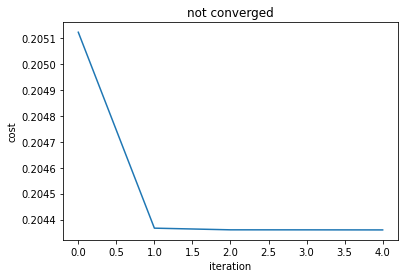

In [13]:
ap[(0, 1)].solution.plot_convergence()

In [25]:
ap.align(reference=1)

/home/icb/giovanni.palla/code/squidpy/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


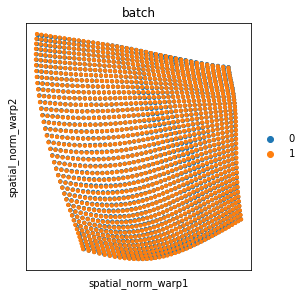

In [26]:
sq.pl.spatial_scatter(adata, shape=None, color="batch", spatial_key="spatial_norm_warp")

In [28]:
from sklearn.metrics import mean_squared_error

ad1 = adata[adata.obs.batch == 0].copy()
ad2 = adata[adata.obs.batch == 1].copy()

_, comm1, comm2 = np.intersect1d(ad1.obs.idx, ad2.obs.idx, return_indices=True)

test_results = {}
mean_squared_error(
    ad1.obsm["spatial_norm_warp"][comm1], ad2.obsm["spatial_norm_warp"][comm2]
)

5.5208535709569563e-05

In [29]:
adata

AnnData object with n_obs × n_vars = 3200 × 500
    obs: 'batch', 'idx', 'synth_batch'
    uns: 'batch_colors'
    obsm: 'spatial', 'spatial_norm', 'spatial_norm_warp'